Datasetを表示する

推論の結果と合わせて表示する

In [1]:
import torch
import torchvision

MODEL = "road_following_model.pth"

device = torch.device('cuda')
output_dim = 2

model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, output_dim)

model = model.to(device)
model.load_state_dict(torch.load(MODEL))

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import re
from utils import preprocess

DIR = "/home/jetson/jetracer/notebooks/"
NAME= "road_following"
APEX = "apex"
CATEGORY = "A"
WIDTH = 5
HEIGHT = 1
IMG_WIDTH = 224
IMG_HEIGHT = 224

# 読み込みを始める最初の数
start_pos = 0

path = DIR + NAME + "_" + CATEGORY + "/" + APEX
filenames = os.listdir(path)

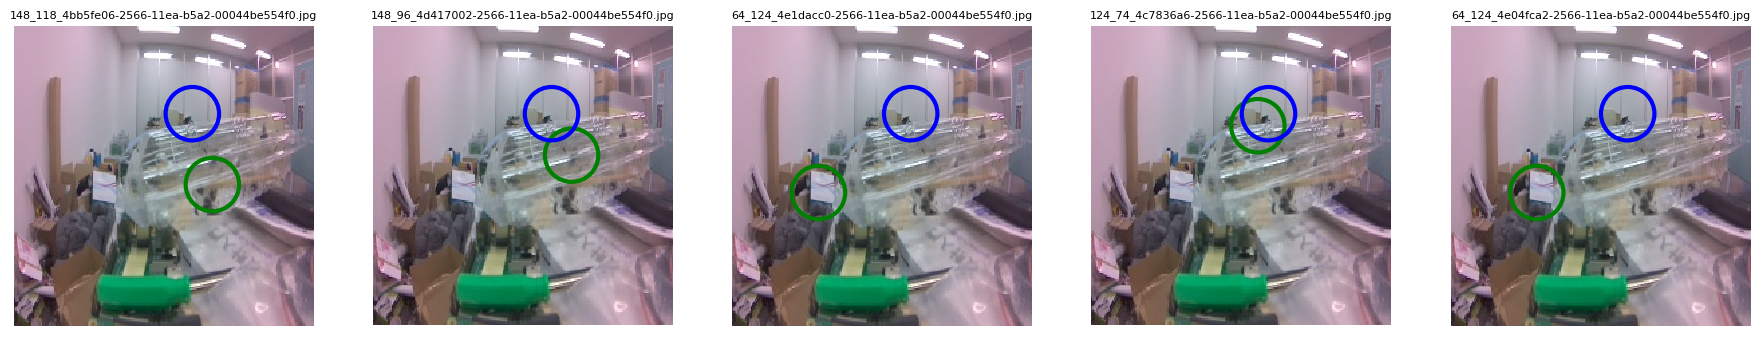

In [3]:
plt.figure(figsize=(IMG_WIDTH/10, IMG_HEIGHT/10), dpi=100)

for i, name in enumerate(filenames):
    if i >= start_pos:
        if i >= WIDTH * HEIGHT + start_pos:
            break
        pattern = '(\d+)_(\d+).*'
        result = re.match(pattern, name)
        
        
        if result:
            x = result.group(1)
            y = result.group(2)
        
        img = mpimg.imread(path + "/" + name)
        
        preprocessed = preprocess(img)
        output = model(preprocessed).detach().cpu().numpy().flatten()
        result_x = output[0]
        result_y = output[1]
        result_x = int(IMG_WIDTH * (result_x / 2.0 + 0.5))
        result_y = int(IMG_HEIGHT * (result_y / 2.0 + 0.5))
        
        plt.subplot(HEIGHT,WIDTH,(i-start_pos)+1)
        plt.tick_params(labelbottom=False,labelleft=False)
        plt.tick_params(bottom=False,left=False,right=False,top=False)
        ax = plt.gca() # get current axis
        
        ax.spines["right"].set_color("none") 
        ax.spines["left"].set_color("none") 
        ax.spines["top"].set_color("none")  
        ax.spines["bottom"].set_color("none") 
        c = patches.Circle(xy=(int(x), int(y)), linewidth=3, radius=20, ec='g',fill=False)
        r = patches.Circle(xy=(int(result_x), int(result_y)), linewidth=3, radius=20, ec='b',fill=False)
        ax.add_patch(c)
        ax.add_patch(r)
        
        plt.title(name,fontsize=8)
        plt.imshow(img)